# SPAM SMS Prediction
## Steps

* Importing libraries
* Data loading and preparing
* Data pre-processing
* Feature extraction techniques selection - TF-IDF
* Model selection - Logistic regression
* Model fitting
* Model testing

## Import libraries

In [13]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

## Import data

In [14]:
df_train = pd.read_csv("spam.csv", encoding='ISO-8859-1')
df_train.head(1000)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
995,ham,Change again... It's e one next to escalator...,NaN,NaN,NaN
996,ham,Yetunde i'm in class can you not run water on ...,NaN,NaN,NaN
997,ham,Not a lot has happened here. Feels very quiet....,NaN,NaN,NaN
998,ham,Then Ì_ wait 4 me at bus stop aft ur lect lar....,NaN,NaN,NaN


In [15]:
df_train = df_train.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [16]:
df_train

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## EDA

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [18]:
df_train.nunique()

v1       2
v2    5169
dtype: int64

In [19]:
df_train['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

#### There is an imbalance of data, we need to handle that

In [20]:
df_train['v2'].duplicated().sum()

403

In [21]:
df_train = df_train.drop_duplicates(subset='v2')

In [22]:
df_train['v2'].duplicated().sum()

0

In [26]:
df_train['v1'] = df_train['v1'].map({'ham': 0, 'spam': 1})
df_train.head()

C:\Users\Ajinkya\AppData\Local\Temp\ipykernel_14116\706978040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['v1'] = df_train['v1'].map({'ham': 0, 'spam': 1})


,v1,v2
0,0,Go until jurong point crazy Available only in ...
1,0,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor U c already then say
4,0,Nah I dont think he goes to usf he lives aroun...


In [27]:
df_train.isna().sum()

v1    0
v2    0
dtype: int64

## Data preprocessing

### Lower casing

In [28]:
df_train['v2'] = df_train['v2'].str.lower()

C:\Users\Ajinkya\AppData\Local\Temp\ipykernel_14116\3660214343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['v2'] = df_train['v2'].str.lower()


### Remove URL

In [29]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

df_train['v2'] = df_train['v2'].apply(lambda x: remove_url(x))

C:\Users\Ajinkya\AppData\Local\Temp\ipykernel_14116\1657883315.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['v2'] = df_train['v2'].apply(lambda x: remove_url(x))


### Remove punctuations

In [30]:
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

exclude = string.punctuation
df_train['v2']  = df_train['v2'].apply(lambda x: remove_punc(x))

C:\Users\Ajinkya\AppData\Local\Temp\ipykernel_14116\2118598232.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['v2']  = df_train['v2'].apply(lambda x: remove_punc(x))


### Remove digits

In [31]:
df_train['v2']  = df_train['v2'].apply(lambda text: re.sub(r'\d+', '', text))

C:\Users\Ajinkya\AppData\Local\Temp\ipykernel_14116\1857655400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['v2']  = df_train['v2'].apply(lambda text: re.sub(r'\d+', '', text))


### Remove stopwords

In [32]:
nltk.download('stopwords')

from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')

def remove_stopwords(text):
    new_text=[]
    for word in text.split():
        if word in english_stopwords:
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)
   
df_train['v2'] = df_train['v2'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ajinkya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Ajinkya\AppData\Local\Temp\ipykernel_14116\3987456833.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['v2'] = df_train['v2'].apply(lambda x: remove_stopwords(x))


In [33]:
df_train['v2']

0       go  jurong point crazy available   bugis n gre...
1                                 ok lar joking wif u oni
2       free entry   wkly comp  win fa cup final tkts ...
3                   u dun say  early hor u c already  say
4        nah  dont think  goes  usf  lives around  though
                              ...                        
5567       nd time   tried contact u u    å£ pound pri...
5568                         ì b going  esplanade fr home
5569                     pity   mood   soany  suggestions
5570     guy   bitching   acted like id  interested  b...
5571                                    rofl  true   name
Name: v2, Length: 5169, dtype: object

In [55]:
X_train = df_train['v2']

In [56]:
y_train = df_train['v1']  

In [57]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train)

In [58]:
y_train

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [60]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((4135,), (1034,), (4135,), (1034,))

## Feature Extraction - TFIDF

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test)

In [63]:
X_train_tfidf.shape

(4135, 7398)

## Model fitting - GridSearchCV Logistic Regression (Before applying SMOTE)

* {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'} Hyper-params after experimentation
* Accuracy = 0.9787
* Precision = 0.9556
* Recall = 0.8897
* F1 Score = 0.9214


In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_reg_grid = {
    'penalty': ['l2'],
    'C': [100],
    'solver': ['saga'],
    'max_iter': [1000],
}

# Setup grid Hyperparamter search for logistic Regression()
log_reg_gs = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose = True,
                         n_jobs=-1)

#Fit our grid Hyperparameter search model
log_reg_gs.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = log_reg_gs.predict(X_test_tfidf)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [68]:
#log_reg_gs.best_params_

{'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}

## Results - Logistic Regression on imblanaced data (TF-IDF)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_lr_tf = accuracy_score(y_test,y_pred)

In [86]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score
)

precision_lr_tf = precision_score(y_test, y_pred)
recall_lr_tf = recall_score(y_test, y_pred)
f1score_lr_tf = f1_score(y_test, y_pred)

print(f"Accuracy = {accuracy_lr_tf.round(4)}")
print(f"Precision = {precision_lr_tf.round(4)}")
print(f"Recall = {recall_lr_tf.round(4)}")
print(f"F1 Score = {f1score_lr_tf.round(4)}")

Accuracy = 0.9787
Precision = 0.9556
Recall = 0.8897
F1 Score = 0.9214


### Applying SMOTE

In [79]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

## Model fitting - GridSearchCV Logistic Regression (After applying SMOTE)
* Accuracy = 0.9797
* Precision = 0.9429
* Recall = 0.9103
* F1 Score = 0.9263

In [88]:
log_reg_grid = {
    'penalty': ['l2'],
    'C': [100],
    'solver': ['saga'],
    'max_iter': [1000],
}

# Setup grid Hyperparamter search for logistic Regression()
log_reg_gs = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose = True,
                         n_jobs=-1)

#Fit our grid Hyperparameter search model
log_reg_gs.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = log_reg_gs.predict(X_test_tfidf)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


## Results - Logistic Regression on balanced data (TF-IDF)

In [89]:
from sklearn.metrics import accuracy_score
accuracy_lr_tf_smote = accuracy_score(y_test,y_pred)

In [90]:

precision_lr_tf_smote = precision_score(y_test, y_pred)
recall_lr_tf_smote = recall_score(y_test, y_pred)
f1score_lr_tf_smote = f1_score(y_test, y_pred)

print(f"Accuracy = {accuracy_lr_tf_smote.round(4)}")
print(f"Precision = {precision_lr_tf_smote.round(4)}")
print(f"Recall = {recall_lr_tf_smote.round(4)}")
print(f"F1 Score = {f1score_lr_tf_smote.round(4)}")

Accuracy = 0.9797
Precision = 0.9429
Recall = 0.9103
F1 Score = 0.9263


## Comparing Logistic Regression (TF-IDF) on Imbalanced and balanced data

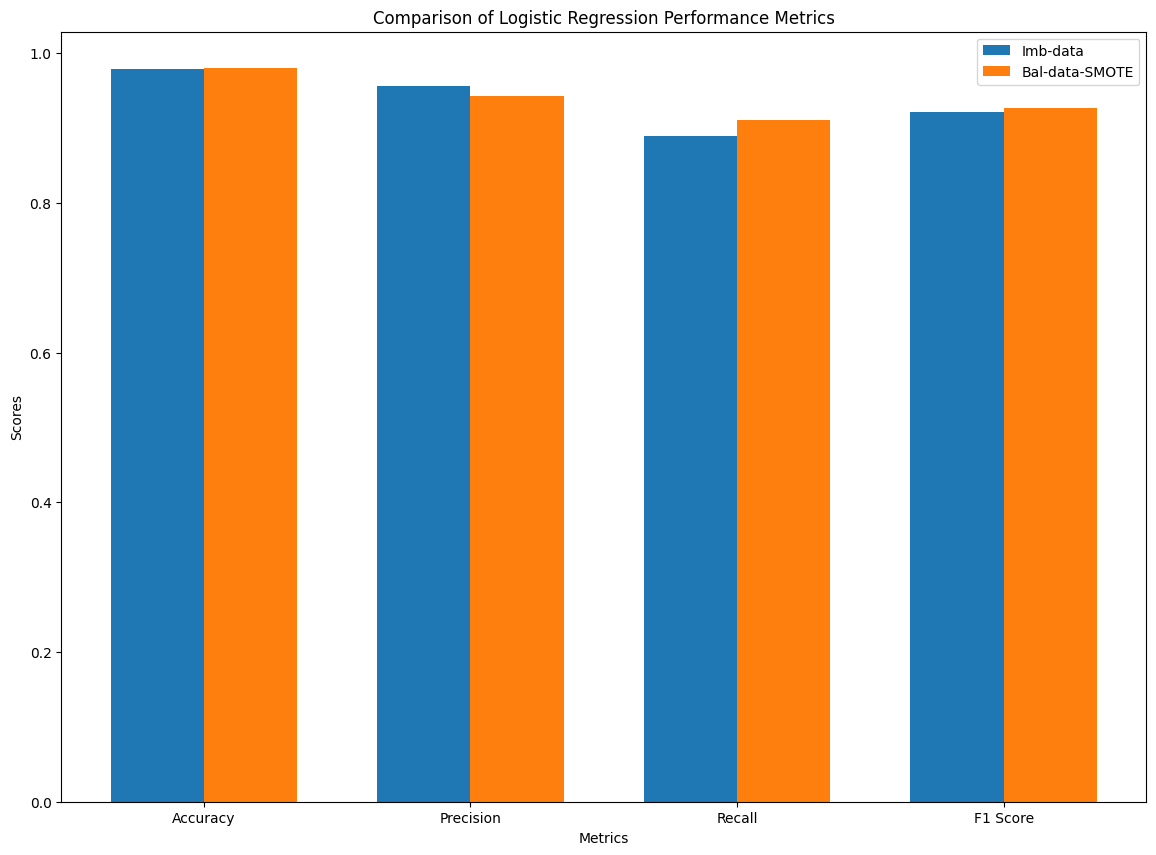

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics and values
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
imb_values = [accuracy_lr_tf, precision_lr_tf, recall_lr_tf, f1score_lr_tf]
bal_values = [accuracy_lr_tf_smote, precision_lr_tf_smote, recall_lr_tf_smote, f1score_lr_tf_smote]

# Create bar width and positions
bar_width = 0.35
index = np.arange(len(metrics_names))

# Plotting the bars
fig, ax = plt.subplots(figsize=(14, 10))
bars1 = ax.bar(index, imb_values, bar_width, label='Imb-data')
bars2 = ax.bar(index + bar_width, bal_values, bar_width, label='Bal-data-SMOTE')

# Adding labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Logistic Regression Performance Metrics')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics_names)
ax.legend()

# Display the plot
plt.show()

# Conclusion
* After balancing the data, Logistic regression slightly performs better